Epoch 1/5
1875/1875 [==============================] - 1s 635us/step - loss: 0.2547 - accuracy: 0.9262
Epoch 2/5
1875/1875 [==============================] - 1s 613us/step - loss: 0.1110 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.0769 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.0570 - accuracy: 0.9832
Epoch 5/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.0441 - accuracy: 0.9862
313/313 - 0s - loss: 0.0792 - accuracy: 0.9748 - 155ms/epoch - 496us/step
Test accuracy: 97.48%
313/313 [==============================] - 0s 342us/step


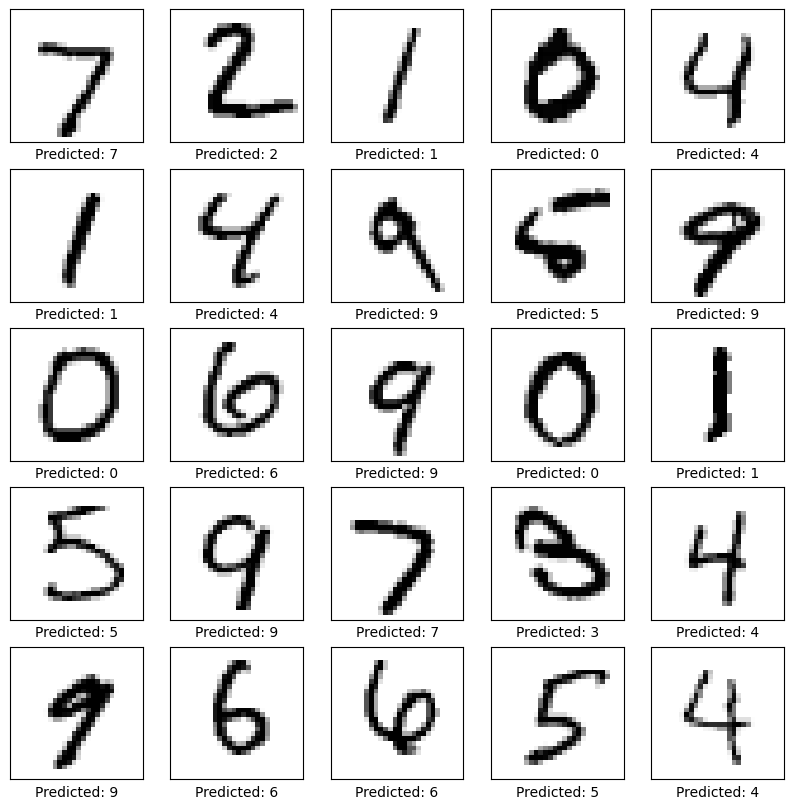

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

import ssl
ssl._create_default_https_context = ssl._create_unverified_context




# Load the MNIST dataset
mnist_data = np.load('/Users/pavitrasrivastava/Downloads/mnist.npz', allow_pickle=True)

# Access the training and test data and labels
X_train, y_train = mnist_data['x_train'], mnist_data['y_train']
X_test, y_test = mnist_data['x_test'], mnist_data['y_test']


# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),   # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Fully connected layer with 10 units (0-9 digits) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

# Make predictions
predictions = model.predict(X_test)

# Display some test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {np.argmax(predictions[i])}")
plt.show()
